In [1]:
from pyspark import SparkConf
from pyspark.sql import SparkSession
from datetime import datetime
from pyspark.sql.functions import broadcast
# startTime = datetime.now()

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy 
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline




Bad key "backend.qt4" on line 43 in
/etc/matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.2/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
import pandas as pd
from pandas import DataFrame
import numpy as np 
import scipy 
import scipy.stats as ss
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [4]:
conf = SparkConf()

conf = conf.set("spark.executor.instances", '8')
conf = conf.set("spark.executor.cores", '4')
conf = conf.set("spark.executor.memory", "60G")
# conf = conf.set("spark.jars", "db2jcc4.jar")
conf = conf.set("spark.sql.legacy.allowCreatingManagedTableUsingNonemptyLocation","true")
conf = conf.set("spark.sql.broadcastTimeout",  "900")
conf = conf.set("spark.driver.maxResultSize", "8g")

spark = SparkSession.builder \
    .config(conf=conf) \
    .config('spark.dynamicAllocation.enabled', 'false') \
    .config('spark.kryoserializer.buffer.max', '2047') \
    .config('spark.io.compression.codec', 'snappy') \
    .config('spark.blacklist.enabled', 'false') \
    .config('spark.dynamicAllocation.enabled', 'false') \
    .master("yarn") \
    .appName("---") \
    .config('spark.yarn.executor.memoryOverhead', '10g') \
    .enableHiveSupport() \
    .getOrCreate()

In [5]:
# LOG_REFRESSION
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
#spark

In [ ]:
#spark.sql("""REFRESH dev_datamart.dm_profilling_te_channelling_summary""")

# PREPROCESSING DATA

In [6]:
# INPUT DATA
df=spark.sql("""


select *  
from dev_datamart.dm_profilling_te_channelling_summary

""")

# type(df)

In [7]:
type(df)

pyspark.sql.dataframe.DataFrame

In [8]:
import databricks.koalas as ks

In [9]:
kdf= df.to_koalas()
kdf.shape

(636829, 22)

In [10]:
isna_rep = kdf.isna().sum().to_frame().reset_index()
isna_rep.columns = ['var','sum_na']
isna_rep['prs']=isna_rep['sum_na']/len(kdf)*100
isna_rep

,var,sum_na,prs
0,jumlah_transaksi,0,0.000000
1,total_berat,189622,10.733975
2,total_amount,228595,12.940128
3,segmentasi,16043,0.908150
4,agama,65700,3.719095
5,profesi,654713,37.061485
6,jumlah_tanggungan,1762343,99.761344
7,pendidikan,722622,40.905625
8,range_gaji,955191,54.070710
9,jenis_kelamin,6,0.000340


In [11]:
# delet jumlah tanggungan
kdf = kdf.drop(columns="jumlah_tanggungan")

In [12]:
# delet na
kdf = kdf.dropna()
kdf.shape

(682487, 17)

In [13]:
isna_rep = kdf.isna().sum().to_frame().reset_index()
isna_rep.columns = ['var','sum_na']
isna_rep['prs']=isna_rep['sum_na']/len(kdf)*100
isna_rep

,var,sum_na,prs
0,jumlah_transaksi,0,0.0
1,total_berat,0,0.0
2,total_amount,0,0.0
3,segmentasi,0,0.0
4,agama,0,0.0
5,profesi,0,0.0
6,pendidikan,0,0.0
7,range_gaji,0,0.0
8,jenis_kelamin,0,0.0
9,range_usia,0,0.0


In [14]:
#pilih jumlah transaksi yang >0 (tidak 0)
kdf  = kdf[kdf['jumlah_transaksi'] > 0]
kdf  = kdf[kdf['total_amount'] > 0]

In [15]:
kdf['total_amount'].min()

32.16

In [16]:
kdf['total_amount'].max()

380000055.1

In [17]:
kdf.mean()

total_amount        160258.824279
jumlah_transaksi         5.770879
total_berat              0.194647
dtype: float64

In [18]:
kdf['total_amount'].min()

32.16

In [19]:
kdf['total_amount'].max()

380000055.1

In [20]:
kdf['total_berat'].min() 

0.0005

In [21]:
kdf['total_berat'].max()

417.1241

In [22]:
kdf.info()

databricks.koalas.frame.DataFrame
Index: 674547 entries, 24 to 1766557
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   jumlah_transaksi  674547 non-null  int64         
 1   total_berat       674547 non-null  float64       
 2   total_amount      674547 non-null  float64       
 3   segmentasi        674547 non-null  object        
 4   agama             674547 non-null  object        
 5   profesi           674547 non-null  object        
 6   pendidikan        674547 non-null  object        
 7   range_gaji        674547 non-null  object        
 8   jenis_kelamin     674547 non-null  object        
 9   range_usia        674547 non-null  object        
 10  status_kyc        674547 non-null  object        
 11  source_kyc        674547 non-null  object        
 12  flag              674547 non-null  object        
 13  tgl_transaksi     674547 non-null  datetime64[ns]
 14  jenis_trans

In [13]:
# delete none
# kdf.dropna(subset=['range_gaji'], inplace=True)
# # kdf = kdf.dropna(how='any',axis=0) 
# len(kdf)
# kdf.mask(kdf.eq('None')).dropna()

In [23]:
kdf.head()

,jumlah_transaksi,total_berat,total_amount,segmentasi,agama,profesi,pendidikan,range_gaji,jenis_kelamin,range_usia,status_kyc,source_kyc,flag,tgl_transaksi,jenis_transaksi,client,region_nm
24,1,0.0140,9996.0,Shopper,ISLAM,Ibu Rumah Tangga,S1,3 - 5 Juta,Perempuan,35-45,1,Outlet,KONVEN,2019-10-22,SALE,TOKOPEDIA,KANTOR PUSAT
40,1,0.2805,199996.5,Shopper,ISLAM,Profesional,SMA,3 - 5 Juta,Laki-laki,35-45,1,Channel,KONVEN,2019-10-03,SALE,TOKOPEDIA,KANTOR PUSAT
54,2,0.0224,20160.0,Best,ISLAM,Lainnya,S1,3 - 5 Juta,Perempuan,25-35,1,Outlet,KONVEN,2021-06-13,SALE,SHOPEE,KANWIL BANDUNG
55,2,0.0228,20132.4,Best,ISLAM,Lainnya,S1,3 - 5 Juta,Perempuan,25-35,1,Outlet,KONVEN,2021-04-22,SALE,SHOPEE,KANWIL BANDUNG
58,10,0.0100,8800.0,Shopper,KATHOLIK,Profesional,SMA,1 - 3 Juta,Laki-laki,25-35,1,Outlet,KONVEN,2021-08-16,SALE,SHOPEE,KANWIL BANDUNG


In [ ]:
# #select variable depent & indpent
# x=kdf[['jumlah_transaksi','total_berat','total_amount','segmentasi','agama','profesi','range_gaji','jenis_kelamin','range_usia','flag','jenis_transaksi','client']]
# y=kdf[['status_kyc']]

In [24]:
#choose categorical
cat_kdf=kdf[['segmentasi','agama','profesi','range_gaji','jenis_kelamin','range_usia','status_kyc','source_kyc','flag','jenis_transaksi','client','region_nm']]
cat2_kdf=kdf[['segmentasi','agama','profesi','range_gaji','jenis_kelamin','range_usia','status_kyc','client',]]

In [10]:
pdf=kdf.to_pandas()
cat_pdf=cat_kdf.to_pandas()
cat2_pdf=cat2_kdf.to_pandas()
type(pdf)

# sn.pairplot(data=pdf)

ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/py4j/java_gateway.py", line 1159, in send_command
    raise Py4JNetworkError("Answer from Java side is empty")
py4j.protocol.Py4JNetworkError: Answer from Java side is empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/py4j/java_gateway.py", line 985, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.6/dist-packages/py4j/java_gateway.py", line 1164, in send_command
    "Error while receiving", e, proto.ERROR_ON_RECEIVE)
py4j.protocol.Py4JNetworkError: Error while receiving
ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:37469)
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/py4j/java_gateway.py", line 929, in _get_connection
    con

Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:37469)

In [26]:
#cek skewness
pdf.skew()

jumlah_transaksi    30.280271
total_berat         52.487545
total_amount        60.843563
status_kyc           0.000000
dtype: float64

In [27]:
#CLEAR NaN
pdf.dropna(inplace=True)

In [28]:
#cek skewness
pdf.skew()

jumlah_transaksi    30.280271
total_berat         52.487545
total_amount        60.843563
status_kyc           0.000000
dtype: float64

In [29]:
pdf.describe()

,jumlah_transaksi,total_berat,total_amount
count,674547.000000,674547.000000,6.745470e+05
mean,5.770879,0.194647,1.602588e+05
std,63.075350,1.636427,1.369101e+06
min,1.000000,0.000500,3.216000e+01
25%,1.000000,0.002300,2.019400e+03
50%,1.000000,0.007300,6.306600e+03
75%,3.000000,0.033900,2.995480e+04
max,4917.000000,417.124100,3.800001e+08


In [30]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674547 entries, 24 to 1766557
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   jumlah_transaksi  674547 non-null  int64         
 1   total_berat       674547 non-null  float64       
 2   total_amount      674547 non-null  float64       
 3   segmentasi        674547 non-null  object        
 4   agama             674547 non-null  object        
 5   profesi           674547 non-null  object        
 6   pendidikan        674547 non-null  object        
 7   range_gaji        674547 non-null  object        
 8   jenis_kelamin     674547 non-null  object        
 9   range_usia        674547 non-null  object        
 10  status_kyc        674547 non-null  object        
 11  source_kyc        674547 non-null  object        
 12  flag              674547 non-null  object        
 13  tgl_transaksi     674547 non-null  datetime64[ns]
 14  je

# OUTLIER

In [113]:
#cek outlier
# https://medium.com/analytics-vidhya/detect-and-handling-outliers-53723d8ec17a

import numpy as np
import pandas as pd
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)
    
outliers(pdf.jumlah_transaksi)

,sub,values
0,IQR,2.000000
1,Upper Bound,6.000000
2,Lower Bound,-2.000000
3,Sum outliers,52444.000000
4,percentage outliers,7.774699


,jumlah_transaksi,total_berat,total_amount,segmentasi,agama,profesi,pendidikan,range_gaji,jenis_kelamin,range_usia,status_kyc,source_kyc,flag,tgl_transaksi,jenis_transaksi,client,region_nm


### Drop Outliers

/home/cdsw/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


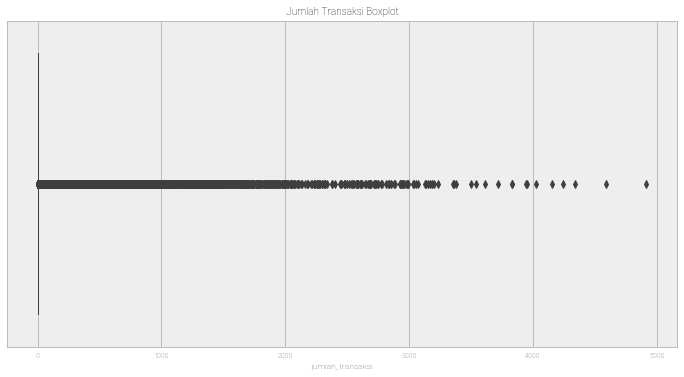

In [20]:
#drop outliers
s = pdf['jumlah_transaksi']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
pdf_drop = pdf[(pdf['jumlah_transaksi'] <= upper_bound)]
pdf_drop = pdf[(pdf['jumlah_transaksi'] >= lower_bound)]
fig,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(pdf_drop.jumlah_transaksi).set_title('Jumlah Transaksi Boxplot')
fig.figure.savefig('JT_drop.png')

In [21]:
pdf_drop

,jumlah_transaksi,total_berat,total_amount,segmentasi,agama,profesi,pendidikan,range_gaji,jenis_kelamin,range_usia,status_kyc,source_kyc,flag,tgl_transaksi,jenis_transaksi,client,region_nm
24,1,0.0140,9996.0,Shopper,ISLAM,Ibu Rumah Tangga,S1,3 - 5 Juta,Perempuan,35-45,1,Outlet,KONVEN,2019-10-22,SALE,TOKOPEDIA,KANTOR PUSAT
40,1,0.2805,199996.5,Shopper,ISLAM,Profesional,SMA,3 - 5 Juta,Laki-laki,35-45,1,Channel,KONVEN,2019-10-03,SALE,TOKOPEDIA,KANTOR PUSAT
54,2,0.0224,20160.0,Best,ISLAM,Lainnya,S1,3 - 5 Juta,Perempuan,25-35,1,Outlet,KONVEN,2021-06-13,SALE,SHOPEE,KANWIL BANDUNG
55,2,0.0228,20132.4,Best,ISLAM,Lainnya,S1,3 - 5 Juta,Perempuan,25-35,1,Outlet,KONVEN,2021-04-22,SALE,SHOPEE,KANWIL BANDUNG
58,10,0.0100,8800.0,Shopper,KATHOLIK,Profesional,SMA,1 - 3 Juta,Laki-laki,25-35,1,Outlet,KONVEN,2021-08-16,SALE,SHOPEE,KANWIL BANDUNG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1766549,1,0.0551,50030.8,Shopper,KATHOLIK,Profesional,SMA,1 - 3 Juta,Perempuan,35-45,1,Outlet,KONVEN,2021-01-10,SALE,SHOPEE,KANWIL JAKARTA 1
1766551,4,0.0044,4021.6,Shopper,KRISTEN,Lainnya,S1,3 - 5 Juta,Perempuan,35-45,1,Outlet,KONVEN,2021-01-05,SALE,SHOPEE,KANWIL SURABAYA
1766552,3,0.0032,2915.2,Shopper,KRISTEN,Lainnya,S1,3 - 5 Juta,Perempuan,35-45,1,Outlet,KONVEN,2020-11-20,SALE,SHOPEE,KANWIL SURABAYA
1766556,2,0.0060,5472.0,Shopper,KATHOLIK,Lainnya,D3,3 - 5 Juta,Perempuan,35-45,1,Outlet,KONVEN,2021-06-08,SALE,SHOPEE,KANWIL SURABAYA


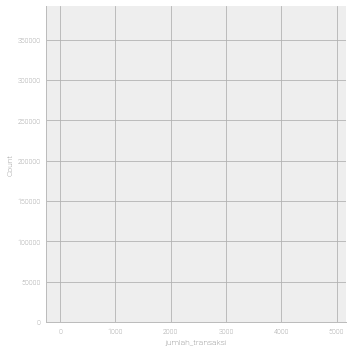

In [22]:
sns.displot(pdf_drop.jumlah_transaksi)

/home/cdsw/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


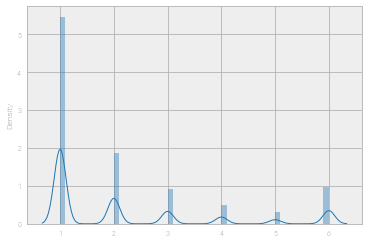

In [23]:
sns.distplot(np.where(pdf["jumlah_transaksi"] > upper_bound,
                               upper_bound,pdf['jumlah_transaksi']))


### Capping outliers values

/home/cdsw/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


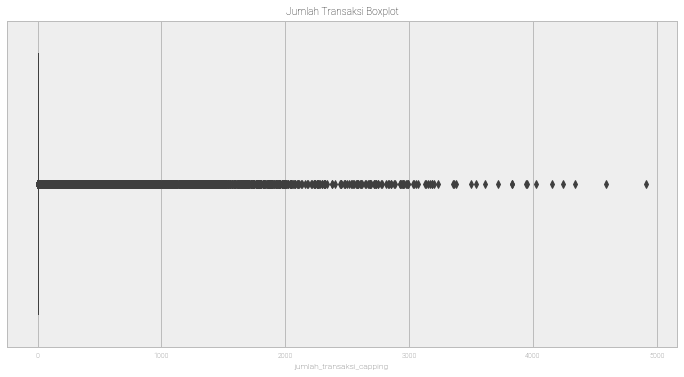

In [24]:
#Capping outliers values
pdf['jumlah_transaksi_capping'] = np.where(pdf["jumlah_transaksi"] > upper_bound,
                               upper_bound,pdf['jumlah_transaksi']) #higher
pdf["jumlah_transaksi_capping"] = np.where(pdf["jumlah_transaksi"] < lower_bound, 
                               lower_bound,pdf['jumlah_transaksi'])
fig,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(pdf.jumlah_transaksi_capping).set_title('Jumlah Transaksi Boxplot')
fig.figure.savefig('_cap.png')

### Replacing with new values

/home/cdsw/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


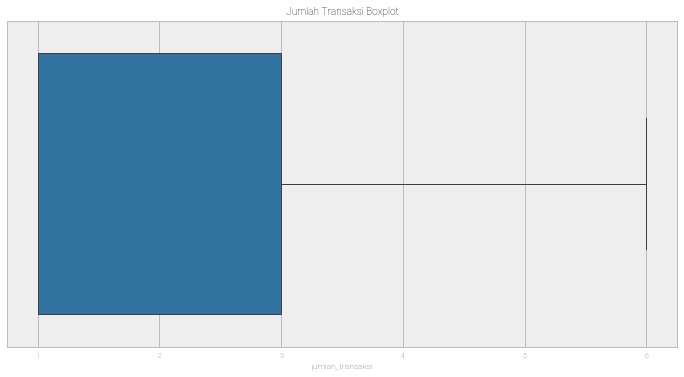

In [25]:
#Replacing with new values
pdf['jumlah_transaksi'] = pdf.jumlah_transaksi.mask(pdf.jumlah_transaksi > upper_bound,pdf.jumlah_transaksi.mean())
pdf['jumlah_transaksi'] = pdf.jumlah_transaksi.mask(pdf.jumlah_transaksi < lower_bound,pdf.jumlah_transaksi.mean())
fig,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(pdf.jumlah_transaksi).set_title('Jumlah Transaksi Boxplot')
fig.figure.savefig('JT_AnVal.png')

pandas.core.frame.DataFrame

In [114]:
pdf.head(100)

,jumlah_transaksi,total_berat,total_amount,segmentasi,agama,profesi,pendidikan,range_gaji,jenis_kelamin,range_usia,status_kyc,source_kyc,flag,tgl_transaksi,jenis_transaksi,client,region_nm
24,1,0.0140,9996.0,Shopper,ISLAM,Ibu Rumah Tangga,S1,3 - 5 Juta,Perempuan,35-45,1,Outlet,KONVEN,2019-10-22,SALE,TOKOPEDIA,KANTOR PUSAT
40,1,0.2805,199996.5,Shopper,ISLAM,Profesional,SMA,3 - 5 Juta,Laki-laki,35-45,1,Channel,KONVEN,2019-10-03,SALE,TOKOPEDIA,KANTOR PUSAT
54,2,0.0224,20160.0,Best,ISLAM,Lainnya,S1,3 - 5 Juta,Perempuan,25-35,1,Outlet,KONVEN,2021-06-13,SALE,SHOPEE,KANWIL BANDUNG
55,2,0.0228,20132.4,Best,ISLAM,Lainnya,S1,3 - 5 Juta,Perempuan,25-35,1,Outlet,KONVEN,2021-04-22,SALE,SHOPEE,KANWIL BANDUNG
58,10,0.0100,8800.0,Shopper,KATHOLIK,Profesional,SMA,1 - 3 Juta,Laki-laki,25-35,1,Outlet,KONVEN,2021-08-16,SALE,SHOPEE,KANWIL BANDUNG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,1,2.2076,2000085.6,Best,ISLAM,Profesional,SMA,< 1 Juta,Perempuan,25-35,1,Outlet,KONVEN,2021-06-04,SALE,TOKOPEDIA,KANTOR PUSAT
495,1,0.0351,30010.5,Shopper,ISLAM,Ibu Rumah Tangga,SMA,3 - 5 Juta,Perempuan,35-45,1,Outlet,KONVEN,2021-06-22,BUY,TOKOPEDIA,KANTOR PUSAT
504,13,0.0147,13274.1,Shopper,ISLAM,Ibu Rumah Tangga,SMA,< 1 Juta,Perempuan,25-35,1,Outlet,KONVEN,2020-12-09,SALE,SHOPEE,KANWIL BANDUNG
507,38,0.4005,363333.6,Shopper,ISLAM,Ibu Rumah Tangga,SMA,1 - 3 Juta,Perempuan,25-35,1,Outlet,KONVEN,2021-01-11,SALE,SHOPEE,KANWIL BANDUNG


# MAKE LABEL ENCODER

In [48]:
#make label
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

segmentasi_encoded = le.fit_transform(pdf['segmentasi'])
pdf['segmentasi_encoded'] = segmentasi_encoded

agama_encoded = le.fit_transform(pdf['agama'])
pdf['agama_encoded'] = agama_encoded

profesi_encoded = le.fit_transform(pdf['profesi'])
pdf['profesi_encoded'] = profesi_encoded

pendidikan_encoded = le.fit_transform(pdf['pendidikan'])
pdf['pendidikan_encoded'] = pendidikan_encoded

range_gaji_encoded = le.fit_transform(pdf['range_gaji'])
pdf['range_gaji_encoded'] = range_gaji_encoded

jk_encoded = le.fit_transform(pdf['jenis_kelamin'])
pdf['jk_encoded'] = jk_encoded

range_usia_encoded = le.fit_transform(pdf['range_usia'])
pdf['range_usia_encoded'] = range_usia_encoded

source_kyc_encoded = le.fit_transform(pdf['source_kyc'])
pdf['source_kyc_encoded'] = source_kyc_encoded

flag_encoded = le.fit_transform(pdf['flag'])
pdf['flag_encoded'] = flag_encoded

jenis_transaksi_encoded = le.fit_transform(pdf['jenis_transaksi'])
pdf['jenis_transaksi_encoded'] = jenis_transaksi_encoded

client_encoded = le.fit_transform(pdf['client'])
pdf['client_encoded'] = client_encoded

region_nm_encoded = le.fit_transform(pdf['region_nm'])
pdf['region_nm_encoded'] = region_nm_encoded

status_kyc_encoded = le.fit_transform(pdf['status_kyc'])
pdf['status_kyc_encoded'] = status_kyc_encoded


print(pdf)
# pdf_label = le.fit_transform(pdf[['jenis_kelamin']])
# pdf.head_label(100)

         jumlah_transaksi  total_berat  total_amount segmentasi     agama  \
24                      1       0.0140        9996.0    Shopper     ISLAM   
40                      1       0.2805      199996.5    Shopper     ISLAM   
54                      2       0.0224       20160.0       Best     ISLAM   
55                      2       0.0228       20132.4       Best     ISLAM   
58                     10       0.0100        8800.0    Shopper  KATHOLIK   
...                   ...          ...           ...        ...       ...   
1766549                 1       0.0551       50030.8    Shopper  KATHOLIK   
1766551                 4       0.0044        4021.6    Shopper   KRISTEN   
1766552                 3       0.0032        2915.2    Shopper   KRISTEN   
1766556                 2       0.0060        5472.0    Shopper  KATHOLIK   
1766557                 1       0.0012        1034.4    Shopper   KRISTEN   

                  profesi pendidikan  range_gaji jenis_kelamin range_usia  

In [49]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674547 entries, 24 to 1766557
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   jumlah_transaksi         674547 non-null  int64         
 1   total_berat              674547 non-null  float64       
 2   total_amount             674547 non-null  float64       
 3   segmentasi               674547 non-null  object        
 4   agama                    674547 non-null  object        
 5   profesi                  674547 non-null  object        
 6   pendidikan               674547 non-null  object        
 7   range_gaji               674547 non-null  object        
 8   jenis_kelamin            674547 non-null  object        
 9   range_usia               674547 non-null  object        
 10  status_kyc               674547 non-null  object        
 11  source_kyc               674547 non-null  object        
 12  flag          

In [24]:
# #Convert Pandas to PySpark (Spark) DataFrame


# sparkDF=spark.createDataFrame(pdf) 

In [50]:
sparkDF.show()

NameError: name 'sparkDF' is not defined

In [ ]:
#pilih variabel yang digunakan
psparkDF=

In [ ]:
cek = pdf.jumlah_transaksi
cek

In [ ]:
cek1 = pdf[['jumlah_transaksi']]
cek1

In [51]:
#choose data 
pdf_label=pdf[['jumlah_transaksi',
'total_berat',
'total_amount',
'segmentasi_encoded',
'agama_encoded',
'profesi_encoded',
'pendidikan_encoded',
'range_gaji_encoded',
'jk_encoded',
'range_usia_encoded',
'status_kyc_encoded',
'source_kyc_encoded',
'flag_encoded',
'jenis_transaksi_encoded',
'client_encoded',
'region_nm_encoded']]
pdf_label.head(100)


,jumlah_transaksi,total_berat,total_amount,segmentasi_encoded,agama_encoded,profesi_encoded,pendidikan_encoded,range_gaji_encoded,jk_encoded,range_usia_encoded,status_kyc_encoded,source_kyc_encoded,flag_encoded,jenis_transaksi_encoded,client_encoded,region_nm_encoded
24,1,0.0140,9996.0,4,2,0,4,3,1,2,0,1,0,3,3,0
40,1,0.2805,199996.5,4,2,9,8,3,0,2,0,0,0,3,3,0
54,2,0.0224,20160.0,1,2,2,4,3,1,1,0,1,0,3,2,2
55,2,0.0228,20132.4,1,2,2,4,3,1,1,0,1,0,3,2,2
58,10,0.0100,8800.0,4,3,9,8,0,0,1,0,1,0,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,1,2.2076,2000085.6,1,2,9,8,5,1,1,0,1,0,3,3,0
495,1,0.0351,30010.5,4,2,0,8,3,1,2,0,1,0,0,3,0
504,13,0.0147,13274.1,4,2,0,8,5,1,1,0,1,0,3,2,2
507,38,0.4005,363333.6,4,2,0,8,0,1,1,0,1,0,3,2,2


# Normalisasi

In [52]:
pdf_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674547 entries, 24 to 1766557
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   jumlah_transaksi         674547 non-null  int64  
 1   total_berat              674547 non-null  float64
 2   total_amount             674547 non-null  float64
 3   segmentasi_encoded       674547 non-null  int64  
 4   agama_encoded            674547 non-null  int64  
 5   profesi_encoded          674547 non-null  int64  
 6   pendidikan_encoded       674547 non-null  int64  
 7   range_gaji_encoded       674547 non-null  int64  
 8   jk_encoded               674547 non-null  int64  
 9   range_usia_encoded       674547 non-null  int64  
 10  status_kyc_encoded       674547 non-null  int64  
 11  source_kyc_encoded       674547 non-null  int64  
 12  flag_encoded             674547 non-null  int64  
 13  jenis_transaksi_encoded  674547 non-null  int64  
 14  cl

In [53]:
#https://stackoverflow.com/questions/24645153/pandas-dataframe-columns-scaling-with-sklearn
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

min_max_scaler = preprocessing.MinMaxScaler()

def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df



In [54]:
# scaled_df = scaleColumns(pdf,['jumlah_transaksi','total_berat','total_amount'])
# scaled_df.head(5)

scaled_df = scaleColumns(pdf_label,['jumlah_transaksi','total_berat','total_amount'])
scaled_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

,jumlah_transaksi,total_berat,total_amount,segmentasi_encoded,agama_encoded,profesi_encoded,pendidikan_encoded,range_gaji_encoded,jk_encoded,range_usia_encoded,status_kyc_encoded,source_kyc_encoded,flag_encoded,jenis_transaksi_encoded,client_encoded,region_nm_encoded
24,0.000407,0.000042,0.000042,4,2,0,4,3,1,2,0,1,0,3,3,0
40,0.000610,0.000582,0.000571,4,2,9,8,3,0,2,0,0,0,3,3,0
54,0.000000,0.000006,0.000006,1,2,2,4,3,1,1,0,1,0,3,2,2
55,0.000000,0.000024,0.000026,1,2,2,4,3,1,1,0,1,0,3,2,2
58,0.000407,0.000007,0.000008,4,3,9,8,0,0,1,0,1,0,3,2,2


In [55]:
#CLEAR NaN
scaled_df.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257356 entries, 24 to 674546
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   jumlah_transaksi         257356 non-null  float64
 1   total_berat              257356 non-null  float64
 2   total_amount             257356 non-null  float64
 3   segmentasi_encoded       257356 non-null  int64  
 4   agama_encoded            257356 non-null  int64  
 5   profesi_encoded          257356 non-null  int64  
 6   pendidikan_encoded       257356 non-null  int64  
 7   range_gaji_encoded       257356 non-null  int64  
 8   jk_encoded               257356 non-null  int64  
 9   range_usia_encoded       257356 non-null  int64  
 10  status_kyc_encoded       257356 non-null  int64  
 11  source_kyc_encoded       257356 non-null  int64  
 12  flag_encoded             257356 non-null  int64  
 13  jenis_transaksi_encoded  257356 non-null  int64  
 14  cli

In [ ]:
#Convert Pandas to PySpark (Spark) DataFrame
sparkDF_label=spark.createDataFrame(pdf_label) 
sparkDF_label.show()



In [ ]:
sparkDF_label=spark.createDataFrame(scaled_df) 
sparkDF_label.show()


In [ ]:
data1=sparkDF_label[['jumlah_transaksi',
'status_kyc']]

In [ ]:
#two in one
def get_dummy(df,indexCol,categoricalCols,continuousCols,labelCol,dropLast=False):

    '''
    Get dummy variables and concat with continuous variables for ml modeling.
    :param df: the dataframe
    :param categoricalCols: the name list of the categorical data
    :param continuousCols:  the name list of the numerical data
    :param labelCol:  the name of label column
    :param dropLast:  the flag of drop last column
    :return: feature matrix

    :author: Wenqiang Feng
    :email:  von198@gmail.com

    >>> df = spark.createDataFrame([
                  (0, "a"),
                  (1, "b"),
                  (2, "c"),
                  (3, "a"),
                  (4, "a"),
                  (5, "c")
              ], ["id", "category"])

    >>> indexCol = 'id'
    >>> categoricalCols = ['category']
    >>> continuousCols = []
    >>> labelCol = []

    >>> mat = get_dummy(df,indexCol,categoricalCols,continuousCols,labelCol)
    >>> mat.show()

    >>>
        +---+-------------+
        | id|     features|
        +---+-------------+
        |  0|[1.0,0.0,0.0]|
        |  1|[0.0,0.0,1.0]|
        |  2|[0.0,1.0,0.0]|
        |  3|[1.0,0.0,0.0]|
        |  4|[1.0,0.0,0.0]|
        |  5|[0.0,1.0,0.0]|
        +---+-------------+
    '''

    from pyspark.ml import Pipeline
    from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
    from pyspark.sql.functions import col

    indexers = [ StringIndexer(inputCol=c, outputCol="{0}_indexed".format(c))
                 for c in categoricalCols ]

    # default setting: dropLast=True
    encoders = [ OneHotEncoder(inputCol=indexer.getOutputCol(),
                 outputCol="{0}_encoded".format(indexer.getOutputCol()),dropLast=dropLast)
                 for indexer in indexers ]

    assembler = VectorAssembler(inputCols=[encoder.getOutputCol() for encoder in encoders]
                                + continuousCols, outputCol="features")

    pipeline = Pipeline(stages=indexers + encoders + [assembler])

    model=pipeline.fit(df)
    data = model.transform(df)

    if indexCol and labelCol:
        # for supervised learning
        data = data.withColumn('label',col(labelCol))
        return data.select(indexCol,'features','label')
    elif not indexCol and labelCol:
        # for supervised learning
        data = data.withColumn('label',col(labelCol))
        return data.select('features','label')
    elif indexCol and not labelCol:
        # for unsupervised learning
        return data.select(indexCol,'features')
    elif not indexCol and not labelCol:
        # for unsupervised learning
        return data.select('features')

In [ ]:
 from pyspark.ml import Pipeline
    from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
    from pyspark.sql.functions import col

In [ ]:
#unsupervised
def get_dummy(df,indexCol,categoricalCols,continuousCols):
    '''
    Get dummy variables and concat with continuous variables for unsupervised learning.
    :param df: the dataframe
    :param categoricalCols: the name list of the categorical data
    :param continuousCols:  the name list of the numerical data
    :return k: feature matrix

    :author: Wenqiang Feng
    :email:  von198@gmail.com
    '''

    indexers = [ StringIndexer(inputCol=c, outputCol="{0}_indexed".format(c))
                 for c in categoricalCols ]

    # default setting: dropLast=True
    encoders = [ OneHotEncoder(inputCol=indexer.getOutputCol(),
                 outputCol="{0}_encoded".format(indexer.getOutputCol()))
                 for indexer in indexers ]

    assembler = VectorAssembler(inputCols=[encoder.getOutputCol() for encoder in encoders]
                                + continuousCols, outputCol="features")

    pipeline = Pipeline(stages=indexers + encoders + [assembler])

    model=pipeline.fit(df)
    data = model.transform(df)

    if indexCol:
        return data.select(indexCol,'features')
    else:
        return data.select('features')

In [ ]:
#unsupervice
get_dummy(data1,[],["jumlah_transaksi"],["status_kyc"])

In [ ]:
#two in one
get_dummy(sparkDF_label,[],[['segmentasi_encoded','status_kyc']],['total_berat'],[])

In [ ]:
cat_pdf.head(20)

In [ ]:
cat2_pdf.info()

# MODEL OLS

In [44]:
#memilik var indept & depent
x=pdf_label[[
'jumlah_transaksi',
'agama_encoded',
'profesi_encoded',
'pendidikan_encoded',
'range_gaji_encoded',
'jk_encoded',
'range_usia_encoded',
'status_kyc',
'client_encoded',
'region_nm_encoded']]
y=pdf_label['jumlah_transaksi']




In [38]:
x=scaled_df[[
'jumlah_transaksi',
    'total_berat',
    'total_amount',
'agama_encoded',
'profesi_encoded',
'pendidikan_encoded',
'range_gaji_encoded',
'jk_encoded',
'range_usia_encoded',
'status_kyc_encoded',
'client_encoded',
'region_nm_encoded']]
y=scaled_df['jumlah_transaksi']



In [39]:
x.head(5)

,jumlah_transaksi,total_berat,total_amount,agama_encoded,profesi_encoded,pendidikan_encoded,range_gaji_encoded,jk_encoded,range_usia_encoded,status_kyc_encoded,client_encoded,region_nm_encoded
24,0.000407,0.000042,0.000042,2,0,4,3,1,2,0,3,0
40,0.000610,0.000582,0.000571,2,9,8,3,0,2,0,3,0
54,0.000000,0.000006,0.000006,2,2,4,3,1,1,0,2,2
55,0.000000,0.000024,0.000026,2,2,4,3,1,1,0,2,2
58,0.000407,0.000007,0.000008,3,9,8,0,0,1,0,2,2


In [40]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257356 entries, 24 to 674546
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   jumlah_transaksi    257356 non-null  float64
 1   total_berat         257356 non-null  float64
 2   total_amount        257356 non-null  float64
 3   agama_encoded       257356 non-null  int64  
 4   profesi_encoded     257356 non-null  int64  
 5   pendidikan_encoded  257356 non-null  int64  
 6   range_gaji_encoded  257356 non-null  int64  
 7   jk_encoded          257356 non-null  int64  
 8   range_usia_encoded  257356 non-null  int64  
 9   status_kyc_encoded  257356 non-null  int64  
 10  client_encoded      257356 non-null  int64  
 11  region_nm_encoded   257356 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 25.5 MB


In [41]:
import statsmodels.formula.api as smf
model = smf.ols('total_berat ~ status_kyc_encoded + client_encoded + region_nm_encoded', x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            total_berat   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2850
Date:                Wed, 10 Nov 2021   Prob (F-statistic):              0.752
Time:                        14:41:29   Log-Likelihood:             1.0677e+06
No. Observations:              257356   AIC:                        -2.135e+06
Df Residuals:                  257353   BIC:                        -2.135e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0005   3.77

In [42]:
model2 = smf.ols('jumlah_transaksi ~ agama_encoded + profesi_encoded + pendidikan_encoded +status_kyc_encoded + client_encoded', x).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:       jumlah_transaksi   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.426
Date:                Wed, 10 Nov 2021   Prob (F-statistic):              0.222
Time:                        14:41:32   Log-Likelihood:             7.4767e+05
No. Observations:              257356   AIC:                        -1.495e+06
Df Residuals:                  257351   BIC:                        -1.495e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0009      0

/home/cdsw/.local/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [43]:
model3 = smf.ols('total_berat ~ status_kyc_encoded+client_encoded+total_amount', x).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:            total_berat   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 1.230e+06
Date:                Wed, 10 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:41:35   Log-Likelihood:             1.3710e+06
No. Observations:              257356   AIC:                        -2.742e+06
Df Residuals:                  257353   BIC:                        -2.742e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4.004e-05   9.52

In [44]:
model4 = smf.ols('total_berat ~ jumlah_transaksi', x).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:            total_berat   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     137.8
Date:                Wed, 10 Nov 2021   Prob (F-statistic):           8.41e-32
Time:                        14:41:37   Log-Likelihood:             1.0678e+06
No. Observations:              257356   AIC:                        -2.136e+06
Df Residuals:                  257354   BIC:                        -2.136e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0005   7.55e-06  

In [45]:
model5 = smf.ols('total_berat ~ total_amount', x).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:            total_berat   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 2.460e+06
Date:                Wed, 10 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:41:39   Log-Likelihood:             1.3710e+06
No. Observations:              257356   AIC:                        -2.742e+06
Df Residuals:                  257354   BIC:                        -2.742e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      2.93e-05   2.33e-06     12.559   

In [46]:
model6 = smf.ols('total_berat ~ agama_encoded', x).fit()
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:            total_berat   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.440
Date:                Wed, 10 Nov 2021   Prob (F-statistic):              0.230
Time:                        14:41:42   Log-Likelihood:             1.0677e+06
No. Observations:              257356   AIC:                        -2.135e+06
Df Residuals:                  257354   BIC:                        -2.135e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0005   1.23e-05     36.842

In [47]:
model7 = smf.ols('total_berat ~ profesi_encoded', x).fit()
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:            total_berat   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01201
Date:                Wed, 10 Nov 2021   Prob (F-statistic):              0.913
Time:                        14:41:44   Log-Likelihood:             1.0677e+06
No. Observations:              257356   AIC:                        -2.135e+06
Df Residuals:                  257354   BIC:                        -2.135e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0005   1.08e-05     

In [48]:
model8 = smf.ols('total_berat ~ range_gaji_encoded', x).fit()
print(model8.summary())

                            OLS Regression Results                            
Dep. Variable:            total_berat   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2244
Date:                Wed, 10 Nov 2021   Prob (F-statistic):              0.636
Time:                        14:41:46   Log-Likelihood:             1.0677e+06
No. Observations:              257356   AIC:                        -2.135e+06
Df Residuals:                  257354   BIC:                        -2.135e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0005   1.21

In [49]:
model9 = smf.ols('total_berat ~ pendidikan_encoded', x).fit()
print(model9.summary())

                            OLS Regression Results                            
Dep. Variable:            total_berat   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.145
Date:                Wed, 10 Nov 2021   Prob (F-statistic):              0.285
Time:                        14:41:49   Log-Likelihood:             1.0677e+06
No. Observations:              257356   AIC:                        -2.135e+06
Df Residuals:                  257354   BIC:                        -2.135e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0005   2.14

In [50]:
model10 = smf.ols('total_berat ~ status_kyc_encoded', x).fit()
print(model10.summary())

                            OLS Regression Results                            
Dep. Variable:            total_berat   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 10 Nov 2021   Prob (F-statistic):                nan
Time:                        14:41:52   Log-Likelihood:             1.0677e+06
No. Observations:              257356   AIC:                        -2.135e+06
Df Residuals:                  257355   BIC:                        -2.135e+06
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0005   7.53

/home/cdsw/.local/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [ ]:
jumlah_transaksi+
    total_berat+
    total_amount+
agama_encoded+
profesi_encoded+
pendidikan_encoded+
range_gaji_encoded+
jk_encoded+
range_usia_encoded+
status_kyc_encoded+
client_encoded+
region_nm_encoded



In [ ]:
print(x)

In [ ]:
plt.plot(x, regr.predict(x), color='blue', linewidth=3)

In [ ]:
#regresi liniear
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

In [ ]:
print('intercept:', model.intercept_)

In [ ]:
print('slope:', model.coef_)

In [ ]:
 y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

In [ ]:
print(x)

In [ ]:
 y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1)
print('predicted response:', y_pred, sep='\n')

# LGBM

In [51]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [52]:
#https://www.analyticsvidhya.com/blog/2021/08/complete-guide-on-how-to-use-lightgbm-in-python/

# To define the input and output feature
x = scaled_df.drop(['total_berat','status_kyc_encoded'],axis=1)
y = scaled_df.total_berat
# train and test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [53]:
x_train.head()

,jumlah_transaksi,total_amount,segmentasi_encoded,agama_encoded,profesi_encoded,pendidikan_encoded,range_gaji_encoded,jk_encoded,range_usia_encoded,source_kyc_encoded,flag_encoded,jenis_transaksi_encoded,client_encoded,region_nm_encoded
257641,0.0,0.000011,1,2,2,8,3,0,1,1,0,3,2,9
486994,0.0,0.000005,4,2,11,8,3,0,1,0,0,3,2,2
646109,0.0,0.000002,4,3,9,8,3,1,2,1,0,3,2,5
269678,0.0,0.001842,4,2,9,8,5,0,1,1,0,3,2,5
78626,0.0,0.000003,1,2,1,8,3,1,1,1,0,3,2,9


In [54]:
x.mean()

jumlah_transaksi           0.001000
total_amount               0.000421
segmentasi_encoded         3.369632
agama_encoded              2.866912
profesi_encoded            3.998827
pendidikan_encoded         6.218005
range_gaji_encoded         2.197384
jk_encoded                 0.525020
range_usia_encoded         1.508925
source_kyc_encoded         0.942648
flag_encoded               0.000000
jenis_transaksi_encoded    2.872915
client_encoded             2.164515
region_nm_encoded          5.415032
dtype: float64

In [55]:
x.max()

jumlah_transaksi            1.000000
total_amount                0.373684
segmentasi_encoded          7.000000
agama_encoded               8.000000
profesi_encoded            11.000000
pendidikan_encoded          9.000000
range_gaji_encoded          6.000000
jk_encoded                  1.000000
range_usia_encoded          5.000000
source_kyc_encoded          1.000000
flag_encoded                0.000000
jenis_transaksi_encoded     4.000000
client_encoded              3.000000
region_nm_encoded          12.000000
dtype: float64

In [56]:
x.min()

jumlah_transaksi           0.0
total_amount               0.0
segmentasi_encoded         0.0
agama_encoded              0.0
profesi_encoded            0.0
pendidikan_encoded         0.0
range_gaji_encoded         0.0
jk_encoded                 0.0
range_usia_encoded         0.0
source_kyc_encoded         0.0
flag_encoded               0.0
jenis_transaksi_encoded    0.0
client_encoded             0.0
region_nm_encoded          0.0
dtype: float64

In [57]:
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],
          verbose=20,eval_metric='logloss')

ValueError: Unknown label type: 'continuous'

In [64]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682487 entries, 24 to 1766557
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   jumlah_transaksi         263390 non-null  float64
 1   total_amount             263390 non-null  float64
 2   segmentasi_encoded       682487 non-null  int64  
 3   agama_encoded            682487 non-null  int64  
 4   profesi_encoded          682487 non-null  int64  
 5   pendidikan_encoded       682487 non-null  int64  
 6   range_gaji_encoded       682487 non-null  int64  
 7   jk_encoded               682487 non-null  int64  
 8   range_usia_encoded       682487 non-null  int64  
 9   source_kyc_encoded       682487 non-null  int64  
 10  flag_encoded             682487 non-null  int64  
 11  jenis_transaksi_encoded  682487 non-null  int64  
 12  client_encoded           682487 non-null  int64  
 13  region_nm_encoded        682487 non-null  int64  
dtypes:

In [58]:
x.head()

,jumlah_transaksi,total_amount,segmentasi_encoded,agama_encoded,profesi_encoded,pendidikan_encoded,range_gaji_encoded,jk_encoded,range_usia_encoded,source_kyc_encoded,flag_encoded,jenis_transaksi_encoded,client_encoded,region_nm_encoded
24,0.000407,0.000042,4,2,0,4,3,1,2,1,0,3,3,0
40,0.000610,0.000571,4,2,9,8,3,0,2,0,0,3,3,0
54,0.000000,0.000006,1,2,2,4,3,1,1,1,0,3,2,2
55,0.000000,0.000026,1,2,2,4,3,1,1,1,0,3,2,2
58,0.000407,0.000008,4,3,9,8,0,0,1,1,0,3,2,2


# CORRELATION

In [ ]:
# Import required libraries
from scipy.stats import kendalltau
from scipy.stats import spearmanr

In [ ]:
corr = pdf.corr()
corr.style.background_gradient(cmap='coolwarm')

### Spearman correlation

In [ ]:
# Calculating Spearman correlation
corrs,_ = spearmanr(X, Y)
print('spearman Rank correlation: %.3f' % corrs)

### Kendall Rank correlation

In [ ]:
# Calculating Kendall Rank correlation
corrk,_ = kendalltau(X, Y)
print('Kendall Rank correlation: %.3f' % corrk)

### Cramer's V

In [ ]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = scipy.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [ ]:
a=[]
index=[]
for i in range(0,len(cat2_pdf.columns)):
  b=[]
  for j in range(0,len(cat2_pdf.columns)):
    c = cramers_v (cat2_pdf[cat2_pdf.columns[i]],cat2_pdf[cat2_pdf.columns[j]])
    b.append(c)
  a.append(b)
  index.append(cat2_pdf.columns[i])

In [ ]:
df2 = DataFrame(np.array(a), index=index, columns=index)

plt.figure(figsize = (10,6))
sns.heatmap(df2, annot=True)
plt.show()

In [ ]:
x1=pdf_label[['segmentasi_encoded',
'status_kyc',
'source_kyc_encoded',
'flag_encoded',
'client_encoded']]
y1=pdf_label['jumlah_transaksi']

In [ ]:
y1

In [ ]:
x1_train, x1_test, y1_train, y1_test=train_test_split(x1, y1, random_state=0)

In [ ]:
logreg = LogisticRegression().fit(x1_train,y1_train)
logreg

In [136]:
compare_models()

NameError: name 'compare_models' is not defined

### ANOVA

In [20]:
#https://github.com/saivishwanathgoud/ANOVA-Test-in-Python/blob/master/ANOVA%20prerequisties%20F-Test.ipynb

pdf=kdf.to_pandas()

KeyboardInterrupt: 

In [ ]:
pdf.describe()

In [26]:
pdf.dtypes

jumlah_transaksi             int64
total_berat                float64
total_amount               float64
segmentasi                  object
agama                       object
profesi                     object
pendidikan                  object
range_gaji                  object
jenis_kelamin               object
range_usia                  object
status_kyc                  object
source_kyc                  object
flag                        object
tgl_transaksi       datetime64[ns]
jenis_transaksi             object
client                      object
region_nm                   object
dtype: object

In [28]:
pdf["segmentasi"].f()

array(['Shopper', 'Best', 'Frequent', 'FirstTime', 'Uncertain',
       'AboutToSleep', 'Valuable', 'Spenders'], dtype=object)

In [58]:
import matplotlib.pyplot as plt 

/home/cdsw/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/cdsw/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/cdsw/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

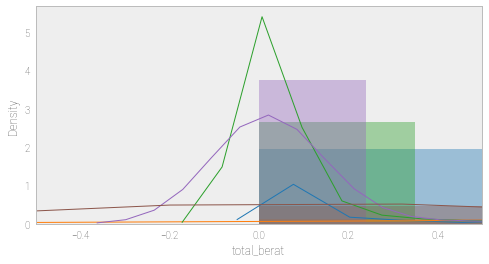

In [61]:
plt.figure(figsize = (8,4))
plt.xlim([-0.5, 0.5])
plt.grid(False)

plt.rcParams.update({'font.size': 14})
sns.distplot(pdf.loc[pdf["segmentasi"] == "Shopper"]["total_berat"])
sns.distplot(pdf.loc[pdf["segmentasi"] == "Best"]["total_berat"])
sns.distplot(pdf.loc[pdf["segmentasi"] == "Frequent"]["total_berat"])
sns.distplot(pdf.loc[pdf["segmentasi"] == "FirtTime"]["total_berat"])
sns.distplot(pdf.loc[pdf["segmentasi"] == "Uncertain"]["total_berat"])
sns.distplot(pdf.loc[pdf["segmentasi"] == "AboutToSleep"]["total_berat"])

In [63]:
pdf["source_kyc"].unique()

array(['Outlet', 'Channel'], dtype=object)

/home/cdsw/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/cdsw/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


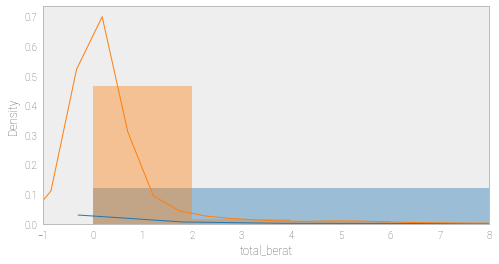

In [69]:
plt.figure(figsize = (8,4))
plt.xlim([-1, 8])
plt.grid(False)

plt.rcParams.update({'font.size': 14})
sns.distplot(pdf.loc[pdf["source_kyc"] == "Outlet"]["total_berat"])
sns.distplot(pdf.loc[pdf["source_kyc"] == "Channel"]["total_berat"])

/home/cdsw/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/cdsw/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


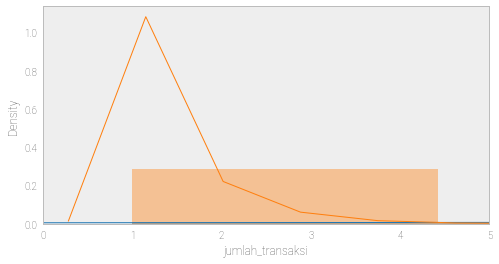

In [71]:
plt.figure(figsize = (8,4))
plt.xlim([0, 5])
plt.grid(False)

plt.rcParams.update({'font.size': 14})
sns.distplot(pdf.loc[pdf["source_kyc"] == "Outlet"]["jumlah_transaksi"])
sns.distplot(pdf.loc[pdf["source_kyc"] == "Channel"]["jumlah_transaksi"])

In [72]:
pdf["jenis_kelamin"].unique()

array(['Perempuan', 'Laki-laki'], dtype=object)

/home/cdsw/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/cdsw/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


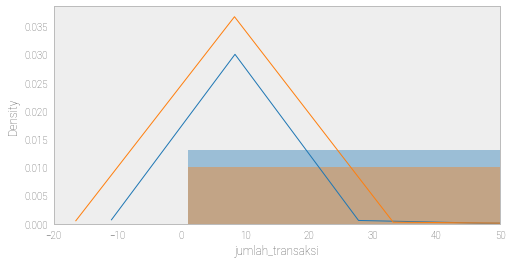

In [78]:
 plt.figure(figsize = (8,4))
plt.xlim([-20, 50])
plt.grid(False)

plt.rcParams.update({'font.size': 14})
sns.distplot(pdf.loc[pdf["jenis_kelamin"] == "Perempuan"]["jumlah_transaksi"])
sns.distplot(pdf.loc[pdf["jenis_kelamin"] == "Laki-laki"]["jumlah_transaksi"])

/home/cdsw/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/cdsw/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


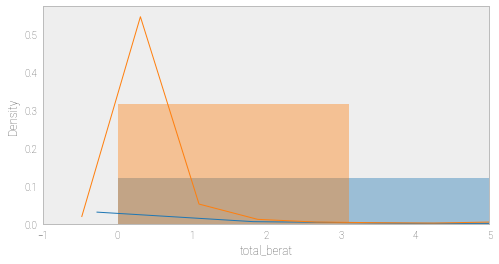

In [79]:
plt.figure(figsize = (8,4))
plt.xlim([-1, 5])
plt.grid(False)

plt.rcParams.update({'font.size': 14})
sns.distplot(pdf.loc[pdf["jenis_kelamin"] == "Perempuan"]["total_berat"])
sns.distplot(pdf.loc[pdf["jenis_kelamin"] == "Laki-laki"]["total_berat"])

KeyboardInterrupt: 

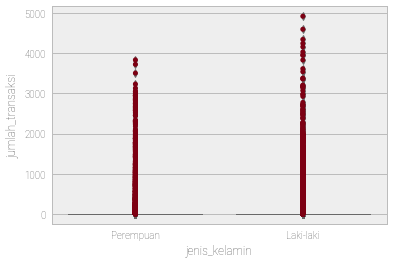

In [80]:
ax = sns.boxplot(x='jenis_kelamin', y='jumlah_transaksi', data=pdf, color='#99c2a2')
ax = sns.swarmplot(x="jenis_kelamin", y="jumlah_transaksi", data=pdf, color='#7d0013')
plt.show()

In [57]:
scaled_df.dtypes

jumlah_transaksi           float64
total_berat                float64
total_amount               float64
segmentasi_encoded           int64
agama_encoded                int64
profesi_encoded              int64
pendidikan_encoded           int64
range_gaji_encoded           int64
jk_encoded                   int64
range_usia_encoded           int64
status_kyc_encoded           int64
source_kyc_encoded           int64
flag_encoded                 int64
jenis_transaksi_encoded      int64
client_encoded               int64
region_nm_encoded            int64
dtype: object

/home/cdsw/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/cdsw/.local/lib/python3.6/site-packages/seaborn/distributions.py:2595: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/cdsw/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/cdsw/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


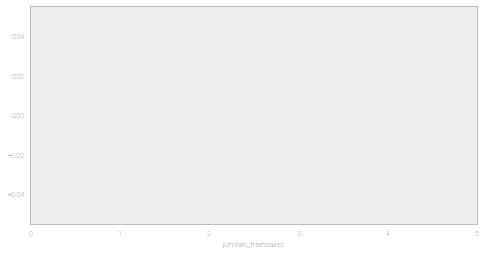

In [58]:
plt.figure(figsize = (8,4))
plt.xlim([0, 5])
plt.grid(False)

plt.rcParams.update({'font.size': 14})
sns.distplot(scaled_df.loc[scaled_df["source_kyc_encoded"] == "Outlet"]["jumlah_transaksi"])
sns.distplot(scaled_df.loc[scaled_df["source_kyc_encoded"] == "Channel"]["jumlah_transaksi"])

In [ ]:
plt.figure(figsize = (8,4))
plt.xlim([0, 5])
plt.grid(False)

plt.rcParams.update({'font.size': 14})
sns.distplot(pdf.loc[pdf["segmentasi"] == "Shopper"]["total_berat"])
sns.distplot(pdf.loc[pdf["segmentasi"] == "Best"]["total_berat"])
sns.distplot(pdf.loc[pdf["segmentasi"] == "Frequent"]["total_berat"])
sns.distplot(pdf.loc[pdf["segmentasi"] == "FirtTime"]["total_berat"])
sns.distplot(pdf.loc[pdf["segmentasi"] == "Uncertain"]["total_berat"])
sns.distplot(pdf.loc[pdf["segmentasi"] == "AboutToSleep"]["total_berat"])